# Generating random price evolution of Coupon-Bearing Bonds

To pick a GHP Portfolio. We can use Zero Coupon Bonds driven by random changes in interest rates using the CIR model. Since these are Zero Coupon, they are already immunized against interest rates if they are held to maturity. In practice, even if we arent able to buy Zero Coupon bonds, we can construct bond portfolios that are designed to be insensitive to interest rates through duration matching.

The following code simulates bond prices of coupon-bearing bonds and shows how their prices change as interest rates fluctuate. 

In [2]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2


First, we'll generate interest rates using the CIR model:

In [3]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0 = 0.03)

## Simulating Prices of a Coupon-bearing Bond

Now that we have the rates over time, we can use it to calculate bond prices:


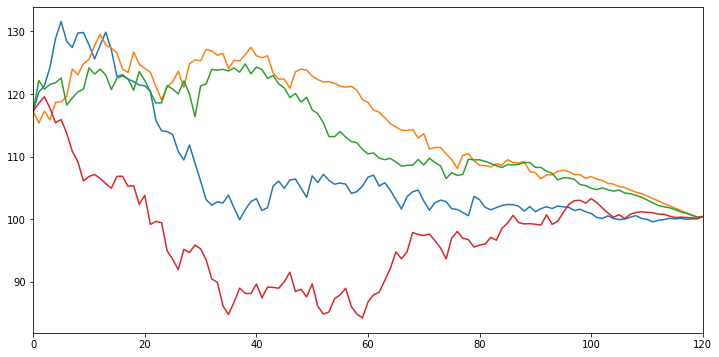

In [4]:
erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]]).plot(legend=False, figsize=(12,6))

In [14]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
prices.head()

,1,2,3,4
0,117.26,117.26,117.26,117.26
1,116.274,115.658,118.041,121.959
2,115.019,121.17,117.825,121.095
3,113.116,119.525,117.114,120.609
4,115.509,120.281,115.525,122.072


## Calculating total returns of bonds

In [5]:
p = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualize_rets(btr, 12)

1    0.031824
2    0.028292
3    0.029157
4    0.036633
dtype: float64

This gives us the approximately 3% return we expected, because that was the prevailing rate when we bought it. We also assumed that we reinvested the coupon in the bond and that is why we did not get the exact same return in each case, since we would observe prices based on the then-prevalent interest rates.